In [ ]:
import os
from google.colab import userdata

# Copy Colab secrets as env vars
os.environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')
os.environ["KAGGLE_KEY"] = userdata.get('KAGGLE_KEY')

In [ ]:
!pwd

/content


In [ ]:
# `import opendatasets as od` might not be flexible, so just make direct Kaggle API calls
from kaggle.api.kaggle_api_extended import KaggleApi
from tqdm import tqdm

# Initialize Kaggle API
api = KaggleApi()

# This authenticate() first looks for ~/.config/kaggle/kaggle.json (downloaded from Kaggle | Settings | API | Create New Token that includes username and API key)
# If the JSON file is not present the command looks into the env vars
api.authenticate()

# Dataset identifier
owner = "sgpjesus"
dataset = "bank-account-fraud-dataset-neurips-2022"
owner_and_dataset_name = owner + "/" + dataset
download_zip_file_name = dataset + ".zip"
extracted_csv_file_name = "Base.csv"

# Get dataset metadata to retrieve file size
dataset_metadata = api.dataset_list_files(owner_and_dataset_name).files

In [ ]:
import pprint
pprint.pprint(dataset_metadata)

[{"ref": "", "datasetRef": "", "ownerRef": "", "name": "Base.csv", "creationDate": "2023-11-29T11:32:19.356Z", "description": "", "fileType": "", "url": "", "totalBytes": 213427735, "columns": []},
 {"ref": "", "datasetRef": "", "ownerRef": "", "name": "Variant I.csv", "creationDate": "2023-11-29T11:32:19.724Z", "description": "", "fileType": "", "url": "", "totalBytes": 213400445, "columns": []},
 {"ref": "", "datasetRef": "", "ownerRef": "", "name": "Variant II.csv", "creationDate": "2023-11-29T11:32:19.511Z", "description": "", "fileType": "", "url": "", "totalBytes": 213537521, "columns": []},
 {"ref": "", "datasetRef": "", "ownerRef": "", "name": "Variant III.csv", "creationDate": "2023-11-29T11:32:21.193Z", "description": "", "fileType": "", "url": "", "totalBytes": 252204320, "columns": []},
 {"ref": "", "datasetRef": "", "ownerRef": "", "name": "Variant IV.csv", "creationDate": "2023-11-29T11:32:20.744Z", "description": "", "fileType": "", "url": "", "totalBytes": 213538370, "c

In [ ]:
api.dataset_metadata(owner_and_dataset_name, path=".")
!cat ./dataset-metadata.json

"{\"datasetId\": 2673949, \"datasetSlug\": \"bank-account-fraud-dataset-neurips-2022\", \"ownerUser\": \"sgpjesus\", \"usabilityRating\": 1.0, \"totalViews\": 94481, \"totalVotes\": 170, \"totalDownloads\": 14344, \"title\": \"Bank Account Fraud Dataset Suite (NeurIPS 2022)\", \"subtitle\": \"Biased, Imbalanced, Dynamic Tabular Datasets for ML Evaluation.\", \"description\": \"The Bank Account Fraud (BAF) suite of datasets has been published at **NeurIPS 2022** and it comprises a total of 6 different synthetic bank account fraud tabular datasets. BAF is a realistic, complete, and robust test bed to evaluate novel and existing methods in ML and fair ML, and the first of its kind!\\n\\n\\n**This suite of datasets is:**\\n- Realistic, based on a present-day real-world dataset for fraud detection;\\n- Biased, each dataset has distinct controlled types of bias;\\n- Imbalanced, this setting presents a extremely low prevalence of positive class;\\n- Dynamic, with temporal data and observed di

In [ ]:
total_csv_file_size = sum([csv_file.total_bytes for csv_file in dataset_metadata])

# Download dataset with progress tracking
with tqdm(total=total_csv_file_size, unit='B', unit_scale=True, unit_divisor=1024, desc="Downloading Dataset") as bar:
    api.dataset_download_files(owner_and_dataset_name, path=".", unzip=False)
    downloaded_size = os.path.getsize(download_zip_file_name)
    bar.update(downloaded_size)

print("Download complete!")


Dataset URL: https://www.kaggle.com/datasets/sgpjesus/bank-account-fraud-dataset-neurips-2022


Download complete!


In [ ]:
#import zipfile module
from zipfile import ZipFile

with ZipFile(dataset + ".zip", 'r') as f:
  #extract only one file, Base.csv, in current directory
  f.extract(extracted_csv_file_name)

**Step 1: Preprocessing**



In [ ]:
import pandas as pd
df = pd.read_csv(extracted_csv_file_name)

df.describe()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,...,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,session_length_in_minutes,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,...,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.0,1000000.000000
mean,0.011029,0.562696,0.493694,16.718568,86.587867,33.689080,1.025705e+00,8.661499,1572.692049,5665.296605,...,0.889676,10.839303,0.222988,515.851010,0.025242,7.544940,0.576947,1.018312,0.0,3.288674
std,0.104438,0.290343,0.289125,44.046230,88.406599,12.025799,5.381835e+00,20.236155,1005.374565,3009.380665,...,0.313293,12.116875,0.416251,487.559902,0.156859,8.033106,0.494044,0.180761,0.0,2.209994
min,0.000000,0.100000,0.000001,-1.000000,-1.000000,10.000000,4.036860e-09,-15.530555,1.000000,-170.603072,...,0.000000,-1.000000,0.000000,190.000000,0.000000,-1.000000,0.000000,-1.000000,0.0,0.000000
25%,0.000000,0.300000,0.225216,-1.000000,19.000000,20.000000,7.193246e-03,-1.181488,894.000000,3436.365848,...,1.000000,-1.000000,0.000000,200.000000,0.000000,3.103053,0.000000,1.000000,0.0,1.000000
50%,0.000000,0.600000,0.492153,-1.000000,52.000000,30.000000,1.517574e-02,-0.830507,1263.000000,5319.769349,...,1.000000,5.000000,0.000000,200.000000,0.000000,5.114321,1.000000,1.000000,0.0,3.000000
75%,0.000000,0.800000,0.755567,12.000000,130.000000,40.000000,2.633069e-02,4.984176,1944.000000,7680.717827,...,1.000000,25.000000,0.000000,500.000000,0.000000,8.866131,1.000000,1.000000,0.0,5.000000
max,1.000000,0.900000,0.999999,383.000000,428.000000,90.000000,7.845690e+01,112.956928,6700.000000,16715.565404,...,1.000000,32.000000,1.000000,2100.000000,1.000000,85.899143,1.000000,2.000000,0.0,7.000000


In [ ]:
df.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0,0.3,0.986506,-1,25,40,0.006735,102.453711,AA,1059,...,0,1500.0,0,INTERNET,16.224843,linux,1,1,0,0
1,0,0.8,0.617426,-1,89,20,0.010095,-0.849551,AD,1658,...,0,1500.0,0,INTERNET,3.363854,other,1,1,0,0
2,0,0.8,0.996707,9,14,40,0.012316,-1.490386,AB,1095,...,0,200.0,0,INTERNET,22.730559,windows,0,1,0,0
3,0,0.6,0.475100,11,14,30,0.006991,-1.863101,AB,3483,...,0,200.0,0,INTERNET,15.215816,linux,1,1,0,0
4,0,0.9,0.842307,-1,29,40,5.742626,47.152498,AA,2339,...,0,200.0,0,INTERNET,3.743048,other,0,1,0,0


Missing Value Detection/Elimination

---

In [ ]:
print("The numbere of missing data cell count = " + str(df.isnull().any(axis=1).sum()))

The numbere of missing data cell count = 0


Outlier Detection/Elimination

---
The next obvious step is to find an abnormal transaction as a potential fraud. I apply both Z-score and IQR methods to each numerical column, not categorical one, and rank rows based on the count of outliers.

Thus, the highest outlier count-theoretically the most suspicious-of a transaction with 10 features would score 20 (10 x 2), as every column gets flagged by both both Z-score and IQR methods.

In [ ]:
from scipy.stats import zscore

# Function to detect outliers and count them per row
def detect_outliers_and_sort(df):
    outlier_counts = pd.Series(0, index=df.index)  # Initialize outlier counter

    for col in df.select_dtypes(include=[np.number]).columns:
        print(f"\nChecking column: {col}")

        # Z-score method
        z_scores = zscore(df[col])
        z_outliers = (np.abs(z_scores) > 3)

        # IQR method
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        iqr_outliers = (df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))

        # Count outliers per row
        outlier_counts += z_outliers.astype(int) + iqr_outliers.astype(int)

    # Add outlier count as the first column in the DataFrame
    df.insert(0, 'Outlier Count', outlier_counts)

    # Sort by number of outliers in descending order
    sorted_df = df.sort_values(by='Outlier Count', ascending=False)

    return sorted_df

# Drop the unnecessary target variable i.e., the fraud_bool column
df = df.drop('fraud_bool', axis=1)

# Identify and sort outliers
sorted_outliers_df = detect_outliers_and_sort(df)

# Display sorted DataFrame
print("\nSorted dataset based on outlier count:")
print(sorted_outliers_df.head())



Checking column: fraud_bool

Checking column: income

Checking column: name_email_similarity

Checking column: prev_address_months_count

Checking column: current_address_months_count

Checking column: customer_age

Checking column: days_since_request

Checking column: intended_balcon_amount

Checking column: zip_count_4w

Checking column: velocity_6h

Checking column: velocity_24h

Checking column: velocity_4w

Checking column: bank_branch_count_8w

Checking column: date_of_birth_distinct_emails_4w

Checking column: credit_risk_score

Checking column: email_is_free

Checking column: phone_home_valid

Checking column: phone_mobile_valid

Checking column: bank_months_count

Checking column: has_other_cards

Checking column: proposed_credit_limit

Checking column: foreign_request

Checking column: session_length_in_minutes

Checking column: keep_alive_session

Checking column: device_distinct_emails_8w

Checking column: device_fraud_count

Checking column: month

Sorted dataset based on

> [In 2023, 5% of all digital transactions originating from Canada were suspected to be fraudulent](https://newsroom.transunion.ca/suspected-digital-fraud-originating-from-canada-soars-in-2023-canada-with-third-highest-increase-in-fraud-rates-among-19-countries-analyzed-by-transunion/)

Thus, I take top 5% (50,000) of the 1 mill records



**Step 2: Feature engineering**

>A great first step is to construct a ranking with a feature utility metric, a function measuring associations between a feature and the target. Then you can choose a smaller set of the most useful features to develop initially and have more confidence that your time will be well spent.

>The metric we'll use is called "mutual information". Mutual information is a lot like correlation in that it measures a relationship between two quantities. The advantage of mutual information is that it can detect any kind of relationship, while correlation only detects linear relationships.

>It's possible for a feature to be very informative when interacting with other features, but not so informative all alone. MI can't detect interactions between features. It is a univariate metric.

>The actual usefulness of a feature depends on the model you use it with. A feature is only useful to the extent that its relationship with the target is one your model can learn. Just because a feature has a high MI score doesn't mean your model will be able to do anything with that information. You may need to transform the feature first to expose the association.

In [ ]:
df = df.drop('Outlier Count', axis=1)

In [ ]:
import numpy as np
from scipy.stats import zscore

# Function to detect outliers using Z-score & IQR
def detect_outliers(df):
    outlier_indices = {}

    for col in df.select_dtypes(include=[np.number]).columns:
        print(f"\nChecking column: {col}")

        # Z-score method
        z_scores = zscore(df[col])
        z_outliers = df[col][(np.abs(z_scores) > 3)]

        # IQR method
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        iqr_outliers = df[col][((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR)))]

        # Store results
        outlier_indices[col] = {
            "Z-score Outliers": z_outliers.tolist(),
            "IQR Outliers": iqr_outliers.tolist()
        }

        print(f"Z-score outliers: {z_outliers.tolist()}")
        print(f"IQR outliers: {iqr_outliers.tolist()}")

    return outlier_indices

# Identify outliers
outliers = detect_outliers(df)


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
target_col ="fraud_bool"

X = df.copy()

# Seprate the dependent/target variable
y = X.pop(target_col)

# Label encoding for categoricals
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = X.dtypes == int

print(discrete_features)

income                              False
name_email_similarity               False
prev_address_months_count            True
current_address_months_count         True
customer_age                         True
days_since_request                  False
intended_balcon_amount              False
payment_type                         True
zip_count_4w                         True
velocity_6h                         False
velocity_24h                        False
velocity_4w                         False
bank_branch_count_8w                 True
date_of_birth_distinct_emails_4w     True
employment_status                    True
credit_risk_score                    True
email_is_free                        True
housing_status                       True
phone_home_valid                     True
phone_mobile_valid                   True
bank_months_count                    True
has_other_cards                      True
proposed_credit_limit               False
foreign_request                   

In [ ]:
from sklearn.preprocessing import StandardScaler

# Scale the data to normalize feature ranges
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-0.90477846,  1.70449737, -0.40227227, ..., -0.10130483,
         0.        , -1.48809246],
       [ 0.81732587,  0.42795351, -0.40227227, ..., -0.10130483,
         0.        , -1.48809246],
       [ 0.81732587,  1.73977873, -0.17523797, ..., -0.10130483,
         0.        , -1.48809246],
       ...,
       [ 0.81732587, -1.22024429, -0.40227227, ..., -0.10130483,
         0.        ,  1.67933831],
       [ 1.16174673, -1.6989691 ,  0.80100952, ..., -0.10130483,
         0.        ,  1.67933831],
       [ 0.12848414,  1.72831068, -0.40227227, ..., -0.10130483,
         0.        ,  1.67933831]])

Method 1: VarianceThreshold

---
Recursive Feature Elimination (RFE) is a feature selection technique that systematically removes the least important features and ranks them based on their contribution to a model.  

With this model, a preset number of features need to be selected in the model. I doubt the appropriate number of features is known prior.

Correlation-based Feature Selection (CBFS) assume features to be **linearly** related, which cannot be assured.

Similarly, L1 Regularisation (Lasso) is a type of linear regression because it models the relationship between the independent variables and the dependent variable using a linear function.

Thus, I decided to conduct the VarianceThreshold method instead to see how the number of features selected change as its variance threshold changes.



In [ ]:
from sklearn.feature_selection import VarianceThreshold

# Apply VarianceThreshold


selector = VarianceThreshold(threshold=100)  # Adjust threshold as needed
filtered_data = selector.fit_transform(X)

# Get remaining feature names
selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features)


Selected Features: Index(['prev_address_months_count', 'current_address_months_count',
       'customer_age', 'intended_balcon_amount', 'zip_count_4w', 'velocity_6h',
       'velocity_24h', 'velocity_4w', 'bank_branch_count_8w',
       'credit_risk_score', 'bank_months_count', 'proposed_credit_limit'],
      dtype='object')


In [ ]:
import matplotlib.pyplot as plt
# Compute variance for each column
variance_values = X.var()
variance_values
# Get minimum and maximum variance
print(variance_values.min())
print(variance_values.max())
print(variance_values.mean())
print(variance_values.mode())

0.9677419354838719
0.9677419354838719
0.9677419354838719


AttributeError: 'numpy.float64' object has no attribute 'mode'

In [ ]:

plt.style.use("seaborn-v0_8-whitegrid")
plt.figure(dpi=100, figsize=(8, 5))
x = variance_values[0]
x
# y = np.log(x)  # Logarithmic transformation of X

# # Create plot
# plt.figure(figsize=(8, 5))
# plt.plot(x, y, label="Logarithmic Function")

# # Set y-axis to logarithmic scale
# plt.yscale('log')

# # Labels and title
# plt.xlabel("X-axis")
# plt.ylabel("Y-axis (Log Scale)")
# plt.title("Logarithmic Scale Plot")
# plt.legend()

# # Show plot
# plt.show()

<ipython-input-35-2aa18536dffd>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x = variance_values[0]


np.float64(0.0842988260396648)

<Figure size 800x500 with 0 Axes>

In [ ]:
from sklearn.feature_selection import mutual_info_classif

# discrete_features=True for categorical variable
mi_scores = mutual_info_classif(X, y, discrete_features=False)

# Convert to a DataFrame for clarity
mi_results = pd.DataFrame({'Feature': X.columns, 'Mutual_Information': mi_scores})
mi_results.sort_values(by='Mutual_Information', ascending=False, inplace=True)

print(mi_results)

                             Feature  Mutual_Information
28         device_distinct_emails_8w            0.202445
19                phone_mobile_valid            0.172366
27                keep_alive_session            0.153131
14                 employment_status            0.140951
16                     email_is_free            0.139142
18                  phone_home_valid            0.100798
7                       payment_type            0.061500
17                    housing_status            0.059107
22             proposed_credit_limit            0.054126
4                       customer_age            0.053680
26                         device_os            0.043779
0                             income            0.036145
21                   has_other_cards            0.033253
30                             month            0.026193
20                 bank_months_count            0.014038
13  date_of_birth_distinct_emails_4w            0.012913
2          prev_address_months_

In [ ]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
print(mi_scores)

,MI Scores
housing_status,0.005437
customer_age,0.002832
income,0.002033
employment_status,0.001533
name_email_similarity,0.000968
current_address_months_count,0.000817
intended_balcon_amount,0.000767
velocity_24h,0.000458
device_fraud_count,0.000325
phone_home_valid,0.000149


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

# from matplotlib import style
# print(plt.style.available)
plt.style.use("seaborn-v0_8-whitegrid")
plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

AttributeError: 'numpy.ndarray' object has no attribute 'sort_values'

<Figure size 800x500 with 0 Axes>

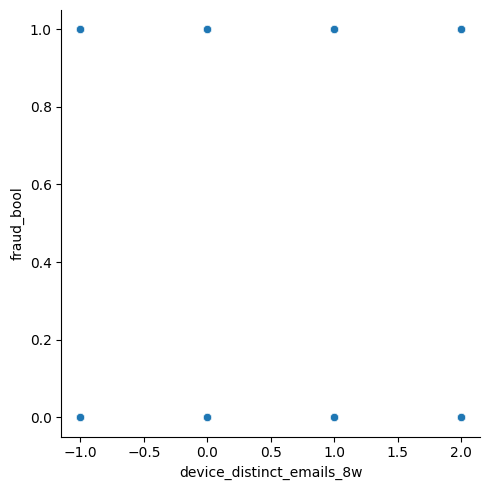

In [ ]:
import seaborn as sns

sns.relplot(x="device_distinct_emails_8w", y="fraud_bool", data=df);

Some of the most popular supervised binary classification models include:  
1️⃣ Logistic Regression

    A simple yet effective model for fraud detection.

    Works well when fraud patterns are linear and interpretable.

2️⃣ Random Forest

    An ensemble of decision trees that improves accuracy.

    Helps detect complex fraud patterns and reduces overfitting.

3️⃣ Gradient Boosting (XGBoost, LightGBM, CatBoost)

    Powerful models that handle imbalanced datasets well.

    Often used in financial fraud detection due to their precision.

4️⃣ Support Vector Machines (SVM)

    Finds the optimal boundary between fraudulent and legitimate transactions.

    Works well for high-dimensional financial data.

5️⃣ Neural Networks (Deep Learning)

    Can learn complex fraud patterns from transaction data.

    Used in real-time fraud detection systems.

In [ ]:
# The keyword "pandas==" without prefix "^" fetches the following entry that is NOT wanted
#   sklearn-pandas==2.2.0


!pip freeze | grep -E '^tqdm==|^pandas==|^google=='

geopandas==1.0.1
google==2.0.3
pandas==2.2.2
sklearn-pandas==2.2.0
tqdm==4.67.1
